In [64]:
import numpy as np
import pickle
import tensorflow as tf
import shap
import joblib
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
dt_1year = pd.date_range(start="2009-01-01",end="2009-12-27", freq='1H', tz='Europe/Berlin')[:-1]

In [3]:
dt_1year

DatetimeIndex(['2009-01-01 00:00:00+01:00', '2009-01-01 01:00:00+01:00',
               '2009-01-01 02:00:00+01:00', '2009-01-01 03:00:00+01:00',
               '2009-01-01 04:00:00+01:00', '2009-01-01 05:00:00+01:00',
               '2009-01-01 06:00:00+01:00', '2009-01-01 07:00:00+01:00',
               '2009-01-01 08:00:00+01:00', '2009-01-01 09:00:00+01:00',
               ...
               '2009-12-26 14:00:00+01:00', '2009-12-26 15:00:00+01:00',
               '2009-12-26 16:00:00+01:00', '2009-12-26 17:00:00+01:00',
               '2009-12-26 18:00:00+01:00', '2009-12-26 19:00:00+01:00',
               '2009-12-26 20:00:00+01:00', '2009-12-26 21:00:00+01:00',
               '2009-12-26 22:00:00+01:00', '2009-12-26 23:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', length=8640, freq='H')

In [57]:
X = np.load('data/input_init.npy')
y = np.load('data/output_init.npy')

In [58]:
X

array([[ 1.11843003e-01,  5.60459360e-01,  3.05550086e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.66325661e-08,  5.54981532e-01,  2.63150617e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.66325661e-08,  5.48519557e-01,  2.30195757e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-6.66325661e-08,  5.33589916e-01,  1.81847190e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.66325673e-08,  5.30187718e-01,  1.79607710e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.66325661e-08,  5.27268299e-01,  1.78131713e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [59]:
y

array([[0.5       , 0.36403575],
       [0.58568588, 0.36499174],
       [0.64958608, 0.36847257],
       ...,
       [0.67339417, 0.49572009],
       [0.6761109 , 0.49553157],
       [0.67718739, 0.49565646]])

In [60]:
X_mini = np.load('data/input.npy')
y_mini = np.load('data/output.npy')

In [61]:
X_mini

array([[ 1.11843003e-01,  5.60459360e-01,  3.05550086e-01,
         1.17500000e-01,  0.00000000e+00],
       [-6.66325661e-08,  5.54981532e-01,  2.63150617e-01,
         1.35000000e-01,  0.00000000e+00],
       [-6.66325661e-08,  5.48519557e-01,  2.30195757e-01,
         1.25000000e-01,  0.00000000e+00],
       ...,
       [-6.66325661e-08,  5.33589916e-01,  1.81847190e-01,
         2.65000000e-01,  0.00000000e+00],
       [-6.66325673e-08,  5.30187718e-01,  1.79607710e-01,
         2.52500000e-01,  0.00000000e+00],
       [-6.66325661e-08,  5.27268299e-01,  1.78131713e-01,
         2.55000000e-01,  0.00000000e+00]])

In [62]:
y_mini

array([[0.5       , 0.36403575],
       [0.58568588, 0.36499174],
       [0.64958608, 0.36847257],
       ...,
       [0.67339417, 0.49572009],
       [0.6761109 , 0.49553157],
       [0.67718739, 0.49565646]])

In [54]:
model = tf.keras.models.load_model('models/nn_controller_small.h5')
model_mini = tf.keras.models.load_model('models/nn_controller_mini.h5')

In [10]:
model.predict(X)

array([[0.50021875, 0.3672721 ],
       [0.58508986, 0.3638776 ],
       [0.64706194, 0.36623704],
       ...,
       [0.6732454 , 0.49591327],
       [0.67586756, 0.49565813],
       [0.67696327, 0.4959684 ]], dtype=float32)

In [63]:
model_mini.predict(X_mini)

array([[0.50788397, 0.3703429 ],
       [0.6022926 , 0.37479618],
       [0.6520726 , 0.3772521 ],
       ...,
       [0.6727034 , 0.49476397],
       [0.6757914 , 0.4941216 ],
       [0.6768724 , 0.49491167]], dtype=float32)

In [66]:
np.sqrt(mean_squared_error(y_mini, model_mini.predict(X_mini)))

0.003663136507756838

In [11]:
shap.initjs()

In [28]:
explainer = shap.KernelExplainer(model.predict, shap.kmeans(X, 10))

In [18]:
shap_values = explainer.shap_values(X)

  0%|          | 0/43200 [00:00<?, ?it/s]

In [19]:
joblib.dump(shap_values, 'shap_values_pbat')

['shap_values_pbat']

In [12]:
shap_values = joblib.load('shap_values')

In [21]:
shap_values_pbat = joblib.load('shap_values_pbat')

In [22]:
shap_values[0].shape

(43200, 54)

In [13]:
feature_names = ['Tr', 'Tw', 'Te', 'Eb']
T = [f'T_{i}' for i in range(0,25)]
SR = [f'SR_{i}' for i in range(0,25)]
feature_names = feature_names + T + SR

In [53]:
[feature_names[i] for i in [0, 1, 2, 4, 29]]

['Tr', 'Tw', 'Te', 'T_0', 'SR_0']

In [21]:
features_df_true

,Tr,Tw,Te,Eb,T_0,T_1,T_2,T_3,T_4,T_5,...,SR_15,SR_16,SR_17,SR_18,SR_19,SR_20,SR_21,SR_22,SR_23,SR_24
0,20.723686,21.923216,20.138851,10329.583130,-5.3,-4.6,-5.0,-5.8,-6.8,-7.1,...,5.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,20.500000,21.884871,19.842054,10194.574867,-4.6,-5.0,-5.8,-6.8,-7.1,-6.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,20.500000,21.839637,19.611370,10063.047436,-5.0,-5.8,-6.8,-7.1,-6.5,-6.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,20.500000,21.801639,19.426928,9941.141223,-5.8,-6.8,-7.1,-6.5,-6.0,-5.4,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,20.500000,21.769776,19.274318,9828.201978,-6.8,-7.1,-6.5,-6.0,-5.4,-4.9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,20.500000,21.795574,19.301403,8818.668099,0.9,0.5,0.6,0.1,0.2,0.3,...,119.444444,77.777778,58.333333,50.000000,33.333333,2.777778,0.0,0.0,0.0,0.0
43196,20.500000,21.763045,19.284319,8814.214796,0.5,0.6,0.1,0.2,0.3,0.4,...,77.777778,58.333333,50.000000,33.333333,2.777778,0.000000,0.0,0.0,0.0,0.0
43197,20.500000,21.735129,19.272930,8809.934890,0.6,0.1,0.2,0.3,0.4,0.5,...,58.333333,50.000000,33.333333,2.777778,0.000000,0.000000,0.0,0.0,0.0,0.0
43198,20.500000,21.711314,19.257254,8805.466457,0.1,0.2,0.3,0.4,0.5,0.6,...,50.000000,33.333333,2.777778,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


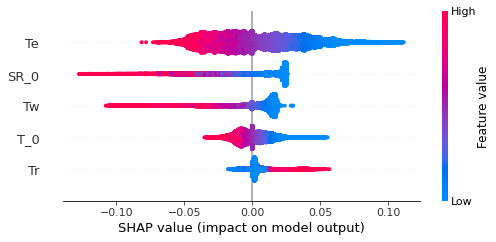

In [67]:
shap.summary_plot(shap_values[0], X, feature_names=feature_names, max_display=5)

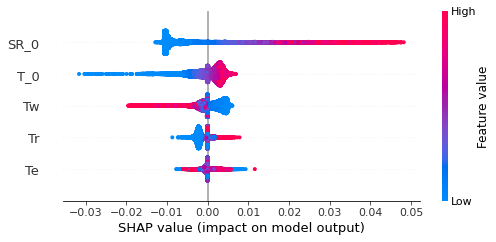

In [68]:
shap.summary_plot(shap_values[1], X, feature_names=feature_names, max_display=5)

In [25]:
output_dict = {0: 'P_hvac', 1: 'P_bat'}

In [26]:
def plot_individual_explanation(explainer, output, index, feature_names):
    return shap.force_plot(explainer.expected_value[output], shap_values[output][index], features_df_true.iloc[index], feature_names=feature_names)

In [29]:
plot_individual_explanation(explainer, 0, 2, feature_names)

In [30]:
plot_individual_explanation(explainer, 1, 4380, feature_names)

(array([32644.,  1194.,  1091.,   991.,   870.,   760.,   765.,   690.,
          720.,  3475.]),
 array([20.49999987, 20.6999999 , 20.89999992, 21.09999995, 21.29999998,
        21.50000001, 21.70000004, 21.90000007, 22.1000001 , 22.30000012,
        22.50000015]),
 <BarContainer object of 10 artists>)

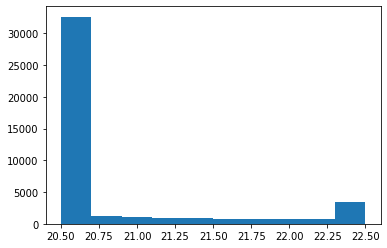

In [31]:
plt.hist(features_df_true['Tr'])

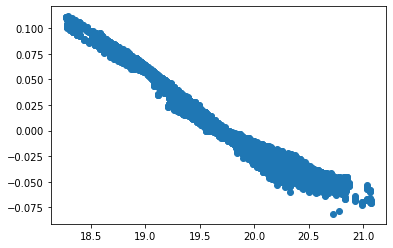

In [32]:
plt.scatter(features_df_true['Te'], shap_values[0][:,2])

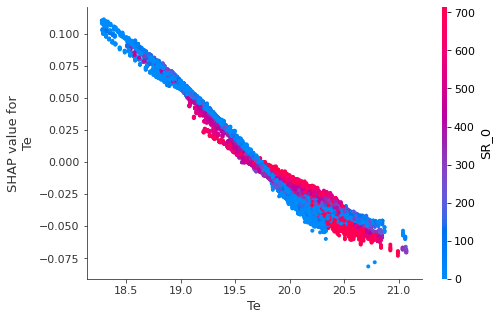

In [69]:
shap.dependence_plot('Te', shap_values[0], features_df_true, interaction_index='SR_0')

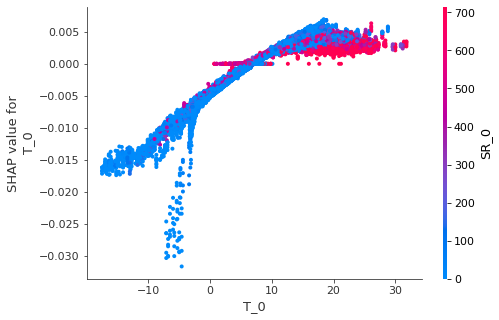

In [34]:
shap.dependence_plot('T_0', shap_values[1], features_df_true, interaction_index='SR_0')

In [35]:
shap_hvac = shap_values[0]
shap_pbat = shap_values[1]

In [36]:
shap_hvac_df = pd.DataFrame(shap_hvac, columns=feature_names)
shap_pbat_df = pd.DataFrame(shap_pbat, columns=feature_names)

In [37]:
dt_index = dt_1year.append(dt_1year).append(dt_1year).append(dt_1year).append(dt_1year)

In [38]:
shap_hvac_df['hour'] = dt_index.hour
shap_hvac_df['month'] = dt_index.month

In [39]:
shap_hvac_df

,Tr,Tw,Te,Eb,T_0,T_1,T_2,T_3,T_4,T_5,...,SR_17,SR_18,SR_19,SR_20,SR_21,SR_22,SR_23,SR_24,hour,month
0,-0.009002,0.009082,-0.046598,-0.003935,0.013993,0.000000,0.006548,-0.011574,-0.008096,-0.000700,...,-0.001814,0.000000,-0.001719,-0.000290,0.0,-0.001498,0.000000,-0.001807,0,1
1,0.002815,0.008948,-0.013855,0.004278,0.021784,0.000552,0.007379,-0.008404,-0.003381,0.000000,...,-0.002592,-0.003154,-0.002177,-0.000388,0.0,-0.001140,0.001443,-0.000887,1,1
2,0.002279,0.009867,0.009328,0.008970,0.021200,0.000000,0.005683,-0.004348,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2,1
3,0.001281,0.009768,0.025762,0.008588,0.022391,0.000000,0.003763,-0.003657,0.000000,0.000944,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3,1
4,0.001722,0.009677,0.038277,0.007337,0.024419,0.000601,0.002642,0.000000,0.000000,0.000341,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,0.002565,0.011931,0.036511,0.000000,0.013637,0.000503,0.001445,0.000000,0.000000,0.000864,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000989,0.000000,19,12
43196,0.001686,0.012981,0.038130,0.000000,0.014583,0.000000,0.001695,0.000000,0.000000,0.001796,...,0.000000,0.000000,0.000000,0.000993,0.0,0.000000,0.000720,0.000000,20,12
43197,0.002168,0.013350,0.038951,0.000000,0.014410,0.000666,0.001102,0.000000,0.000000,0.000915,...,0.000000,0.000000,0.000000,0.000322,0.0,0.000000,0.000229,0.000000,21,12
43198,0.001609,0.013625,0.040607,0.000000,0.015003,0.000622,0.001166,0.000000,0.000000,0.001513,...,0.000000,0.000000,0.000000,0.000327,0.0,0.000000,0.000967,0.000000,22,12


In [40]:
shap_df_winter = shap_hvac_df[shap_hvac_df.month.isin([1,2,12])]
shap_df_spring = shap_hvac_df[shap_hvac_df.month.isin([3,4,5])]
shap_df_summer = shap_hvac_df[shap_hvac_df.month.isin([6,7,8])]
shap_df_autumn = shap_hvac_df[shap_hvac_df.month.isin([9,10,11])]

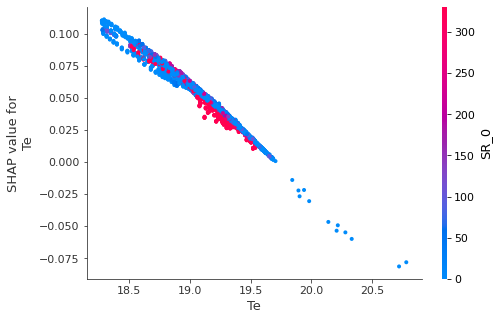

In [70]:
shap.dependence_plot('Te', shap_values[0][shap_df_winter.index], features_df_true.loc[shap_df_winter.index], interaction_index='SR_0')

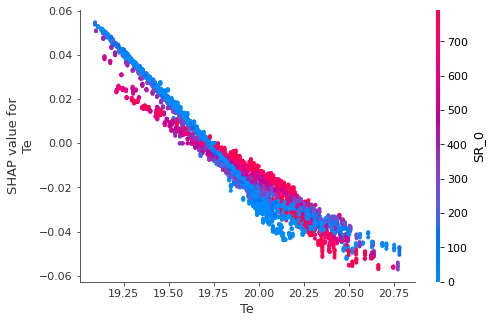

In [71]:
shap.dependence_plot('Te', shap_values[0][shap_df_spring.index], features_df_true.loc[shap_df_spring.index], interaction_index='SR_0')

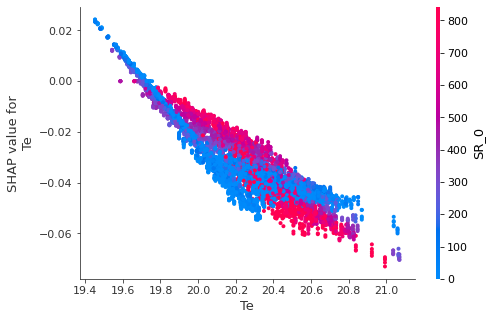

In [72]:
shap.dependence_plot('Te', shap_values[0][shap_df_summer.index], features_df_true.loc[shap_df_summer.index], interaction_index='SR_0')

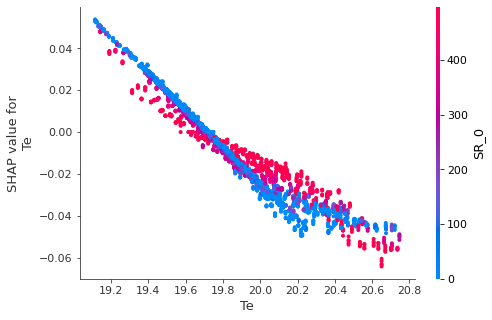

In [73]:
shap.dependence_plot('Te', shap_values[0][shap_df_autumn.index], features_df_true.loc[shap_df_autumn.index], interaction_index='SR_0')

In [15]:
features_df = pd.DataFrame(X, columns = feature_names)

In [16]:
features_df

,Tr,Tw,Te,Eb,T_0,T_1,T_2,T_3,T_4,T_5,...,SR_15,SR_16,SR_17,SR_18,SR_19,SR_20,SR_21,SR_22,SR_23,SR_24
0,1.118430e-01,0.560459,0.305550,0.532958,0.1175,0.1350,0.1250,0.1050,0.0800,0.0725,...,0.004630,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,-6.663257e-08,0.554982,0.263151,0.519457,0.1350,0.1250,0.1050,0.0800,0.0725,0.0875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,-6.663257e-08,0.548520,0.230196,0.506305,0.1250,0.1050,0.0800,0.0725,0.0875,0.1000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,-6.663257e-08,0.543091,0.203847,0.494114,0.1050,0.0800,0.0725,0.0875,0.1000,0.1150,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,-6.663257e-08,0.538539,0.182045,0.482820,0.0800,0.0725,0.0875,0.1000,0.1150,0.1275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,-6.663257e-08,0.542225,0.185915,0.381867,0.2725,0.2625,0.2650,0.2525,0.2550,0.2575,...,0.099537,0.064815,0.048611,0.041667,0.027778,0.002315,0.0,0.0,0.0,0.0
43196,-6.663257e-08,0.537578,0.183474,0.381421,0.2625,0.2650,0.2525,0.2550,0.2575,0.2600,...,0.064815,0.048611,0.041667,0.027778,0.002315,0.000000,0.0,0.0,0.0,0.0
43197,-6.663257e-08,0.533590,0.181847,0.380993,0.2650,0.2525,0.2550,0.2575,0.2600,0.2625,...,0.048611,0.041667,0.027778,0.002315,0.000000,0.000000,0.0,0.0,0.0,0.0
43198,-6.663257e-08,0.530188,0.179608,0.380547,0.2525,0.2550,0.2575,0.2600,0.2625,0.2650,...,0.041667,0.027778,0.002315,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [17]:
features_df

,Tr,Tw,Te,Eb,T_0,T_1,T_2,T_3,T_4,T_5,...,SR_15,SR_16,SR_17,SR_18,SR_19,SR_20,SR_21,SR_22,SR_23,SR_24
0,1.118430e-01,0.560459,0.305550,0.532958,0.1175,0.1350,0.1250,0.1050,0.0800,0.0725,...,0.004630,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,-6.663257e-08,0.554982,0.263151,0.519457,0.1350,0.1250,0.1050,0.0800,0.0725,0.0875,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,-6.663257e-08,0.548520,0.230196,0.506305,0.1250,0.1050,0.0800,0.0725,0.0875,0.1000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,-6.663257e-08,0.543091,0.203847,0.494114,0.1050,0.0800,0.0725,0.0875,0.1000,0.1150,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,-6.663257e-08,0.538539,0.182045,0.482820,0.0800,0.0725,0.0875,0.1000,0.1150,0.1275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43195,-6.663257e-08,0.542225,0.185915,0.381867,0.2725,0.2625,0.2650,0.2525,0.2550,0.2575,...,0.099537,0.064815,0.048611,0.041667,0.027778,0.002315,0.0,0.0,0.0,0.0
43196,-6.663257e-08,0.537578,0.183474,0.381421,0.2625,0.2650,0.2525,0.2550,0.2575,0.2600,...,0.064815,0.048611,0.041667,0.027778,0.002315,0.000000,0.0,0.0,0.0,0.0
43197,-6.663257e-08,0.533590,0.181847,0.380993,0.2650,0.2525,0.2550,0.2575,0.2600,0.2625,...,0.048611,0.041667,0.027778,0.002315,0.000000,0.000000,0.0,0.0,0.0,0.0
43198,-6.663257e-08,0.530188,0.179608,0.380547,0.2525,0.2550,0.2575,0.2600,0.2625,0.2650,...,0.041667,0.027778,0.002315,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [18]:
lb = np.array([20.5, 18.0, 18.0, 5000.0] + [-10] * 25 + [0] * 25)
ub = np.array([22.5, 25.0, 25.0, 15000.0] + [30] * 25 + [1200] * 25)

In [19]:
lb-ub

array([-2.0e+00, -7.0e+00, -7.0e+00, -1.0e+04, -4.0e+01, -4.0e+01,
       -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01,
       -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01,
       -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01,
       -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01, -4.0e+01, -1.2e+03,
       -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03,
       -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03,
       -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03,
       -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03, -1.2e+03])

In [20]:
features_df_true = features_df.apply(lambda x: lb+(ub-lb)*x, axis=1)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


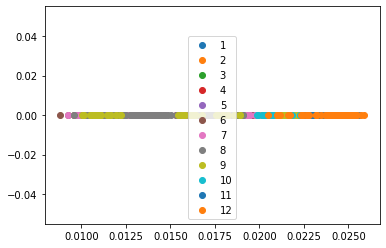

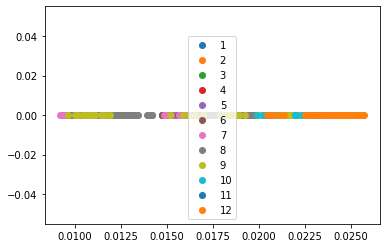

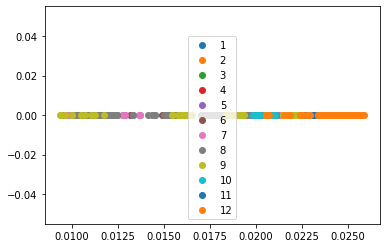

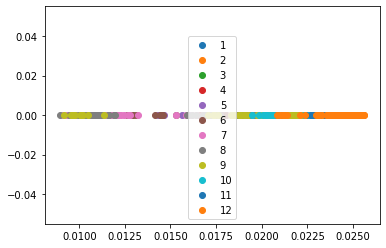

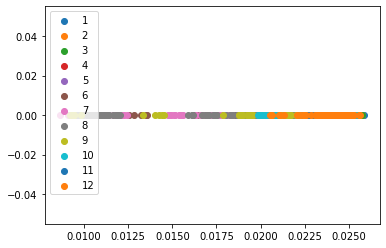

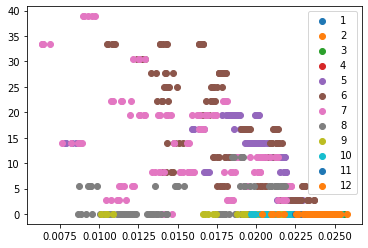

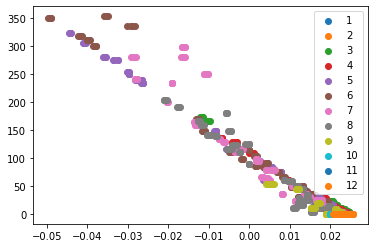

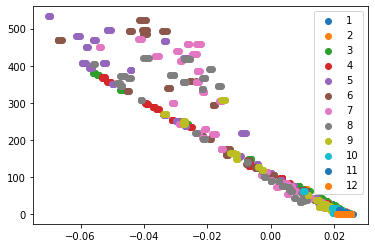

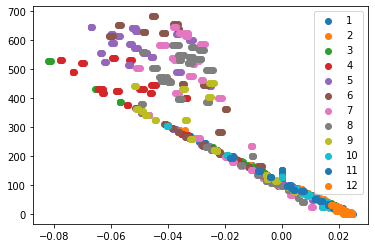

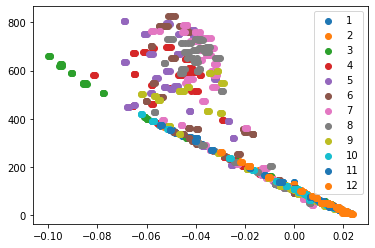

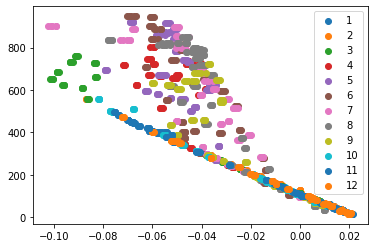

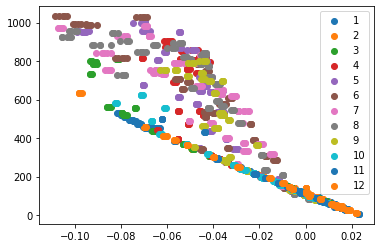

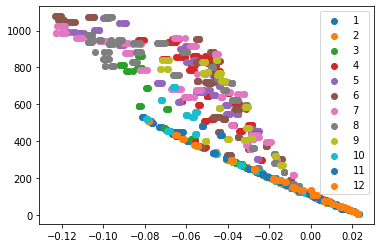

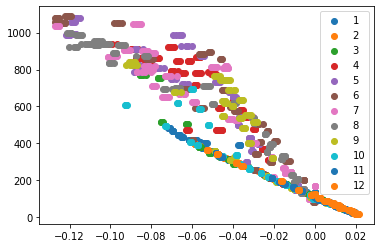

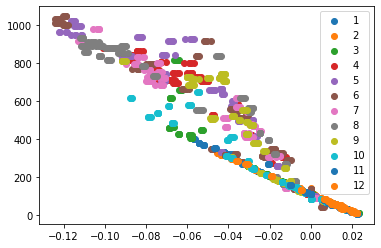

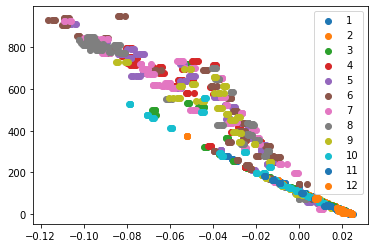

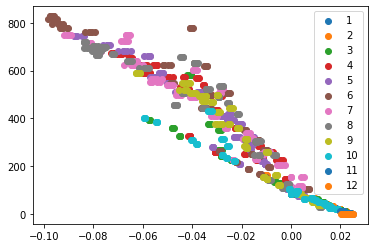

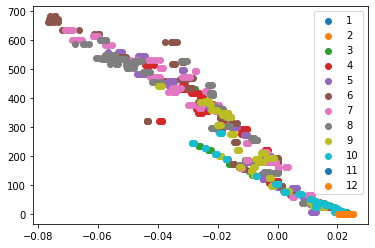

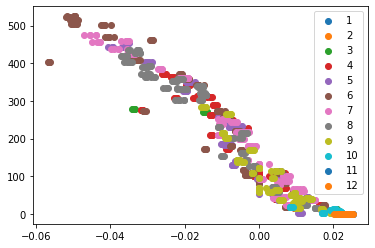

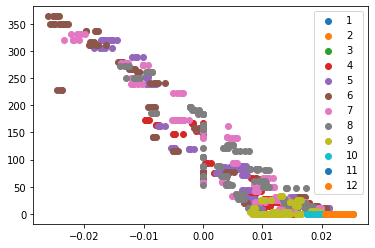

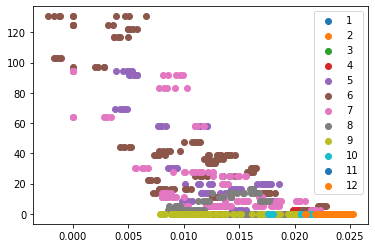

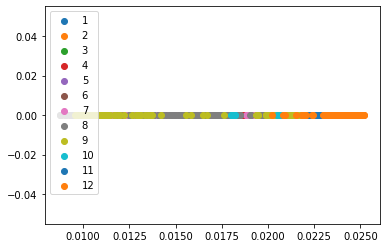

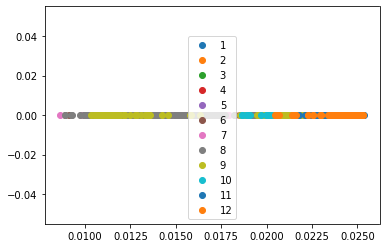

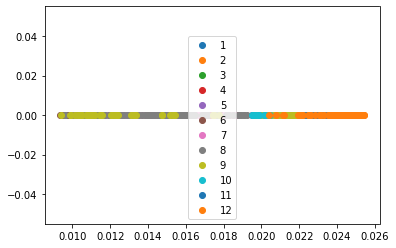

In [225]:
for i in range(24):
    fig, ax = plt.subplots()
    for month in range(1,13):
        ax.scatter(shap_hvac_df['SR_0'][(dt_index.hour==i)&(dt_index.month==month)],
                   features_df_true['SR_0'][(dt_index.hour==i)&(dt_index.month==month)],
                   label=month)
    ax.legend()